In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\TOSHIBA\Documents\Practice\Project to be updated on CV\Uber Data Analysis\Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.shape

(6745, 6)

In [5]:
len(df["Request id"].unique())

6745

In [6]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
percentage_missing =df.isnull().sum()/df.shape[0]*100
percentage_missing

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [11]:
df["Pickup point"].value_counts()

(City       3507
 Airport    3238
 Name: Pickup point, dtype: int64,
 Trip Completed       2831
 No Cars Available    2650
 Cancelled            1264
 Name: Status, dtype: int64)

In [17]:
df["Status"].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [54]:
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 9:40         6
11/7/2016 8:37         6
11/7/2016 17:57        6
11/7/2016 5:12         5
                      ..
15-07-2016 20:33:46    1
13-07-2016 09:24:46    1
14-07-2016 13:01:57    1
14-07-2016 07:32:52    1
15-07-2016 13:03:25    1
Name: Request timestamp, Length: 5618, dtype: int64

In [13]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [14]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [15]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [18]:
df["Request timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [16]:
df["Drop timestamp"].value_counts()

12/7/2016 6:22         4
11/7/2016 13:00        4
12/7/2016 21:53        4
12/7/2016 21:04        4
11/7/2016 7:50         3
                      ..
13-07-2016 08:44:39    1
14-07-2016 13:45:28    1
13-07-2016 05:56:07    1
15-07-2016 07:17:47    1
15-07-2016 12:04:15    1
Name: Drop timestamp, Length: 2598, dtype: int64

In [19]:
df["Drop timestamp"]= df["Request timestamp"].astype(str)
df["Request timestamp"]=df["Request timestamp"].replace("/","-")
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [22]:
df["Drop timestamp"].value_counts().head()

2016-07-11 17:57:00    6
2016-07-11 19:02:00    6
2016-07-11 09:40:00    6
2016-07-11 08:37:00    6
2016-07-11 09:24:00    5
Name: Drop timestamp, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     6745 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [23]:
df["Drop timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [24]:
df["req_hour"]=df["Request timestamp"].dt.hour

In [25]:
df["req_day"]=df["Request timestamp"].dt.day

In [27]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 11:51:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 17:57:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:17:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 21:08:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 08:33:16,8,13


**From the below graph we can conclude that most of the trips completed at 5th req_hour and at 18th req_hour mostly cars are not available **

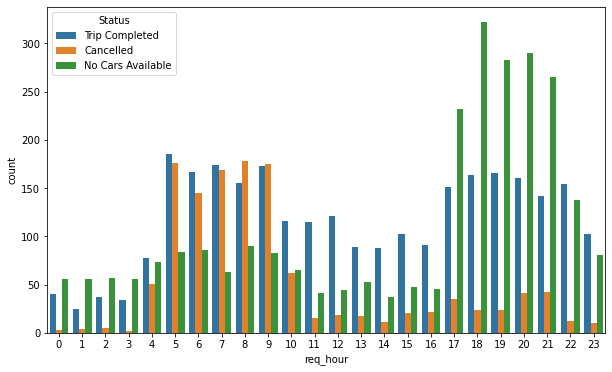

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

In [28]:
df.req_day.value_counts()

15    1381
11    1367
14    1353
13    1337
12    1307
Name: req_day, dtype: int64

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 576x1440 with 0 Axes>

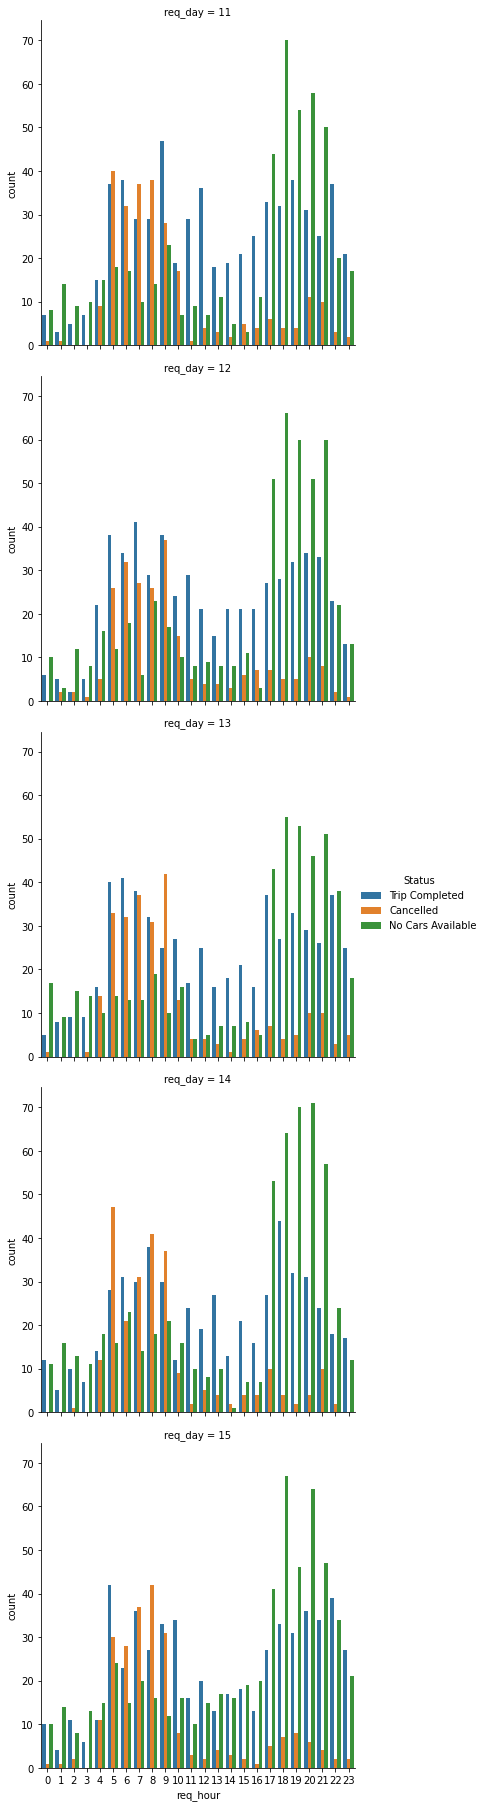

In [31]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Status",kind="count")
plt.show()

** From the below graph we can conclude that between 5-10 req_hour mostly pickups are from city 
and between 17 to 22 req_hour mostly pickups are from Airport**

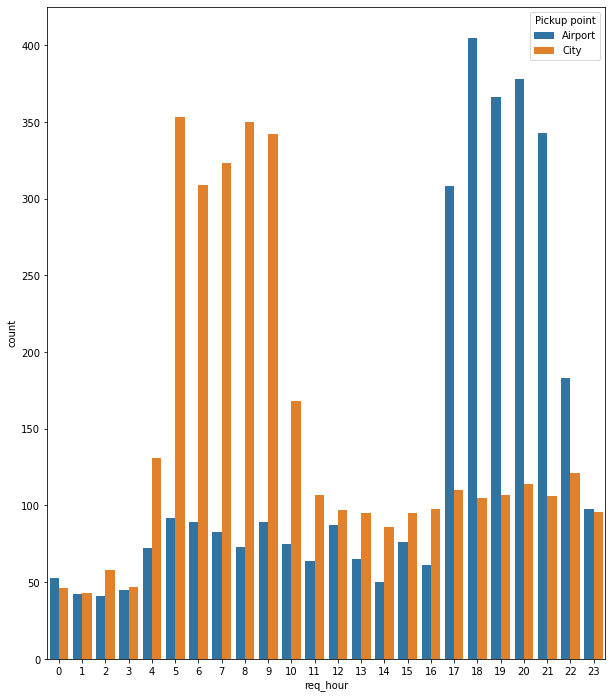

In [32]:
plt.figure(figsize=(10,12))
sns.countplot(x="req_hour",data=df,hue="Pickup point")
plt.show()

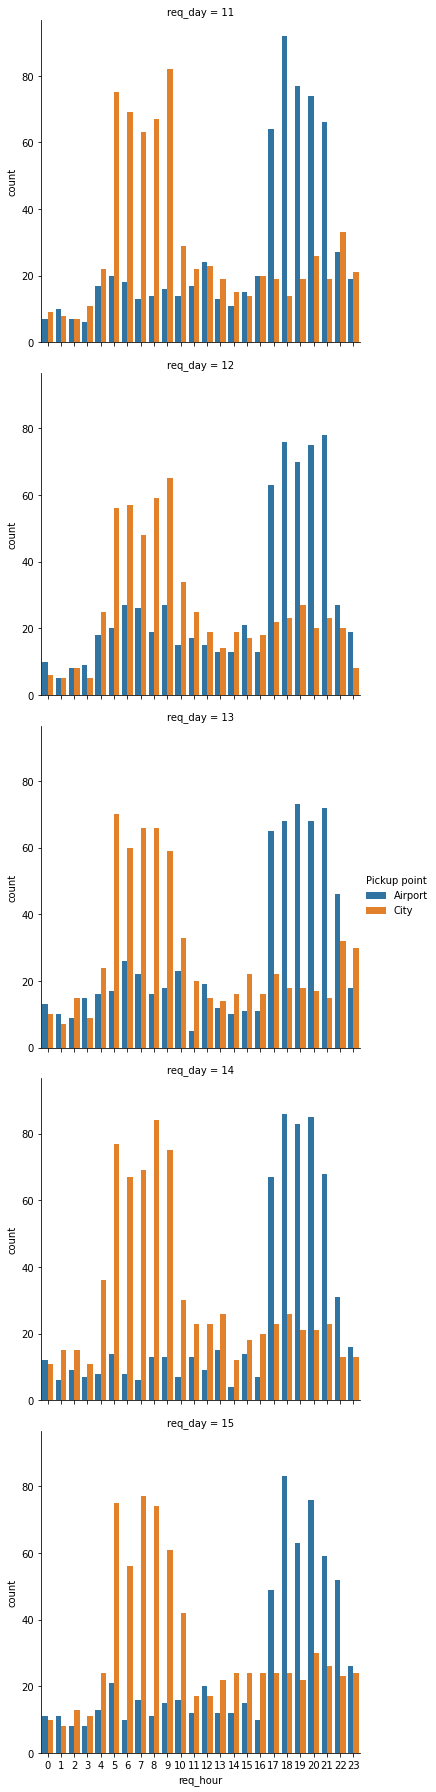

In [71]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Pickup point",kind="count")
plt.show()

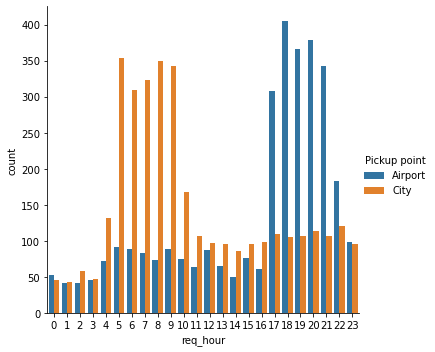

In [72]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [33]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 11:51:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 17:57:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:17:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 21:08:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 08:33:16,8,13


In [34]:
time_slot=[]
for i in df.req_hour:
    if i < 5 :
        time_slot.append("Pre_Morning")
    elif i >= 5 and i < 10:
        time_slot.append("Morning_Rush")
    elif i >=10 and i <17:
        time_slot.append("Day_time")
    elif i >= 17 and i <22:
        time_slot.append("Evening_Rush")
    else :
        time_slot.append("Late_night")

In [36]:
len(time_slot)

6745

In [41]:
df=pd.concat([df,pd.DataFrame(time_slot,columns=["Time_Slot"])],axis=1 )

In [47]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 11:51:00,11,11,Day_time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 17:57:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:17:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 21:08:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 08:33:16,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,2016-07-15 23:49:03,23,15,Late_night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,2016-07-15 23:50:05,23,15,Late_night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,2016-07-15 23:52:06,23,15,Late_night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,2016-07-15 23:54:39,23,15,Late_night


In [48]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_time        1224
Pre_Morning      578
Late_night       498
Name: Time_Slot, dtype: int64

** From below graph we comeup with the insight that during evening rush mostly cars are not available & mostly rides cancelled during morning rush**

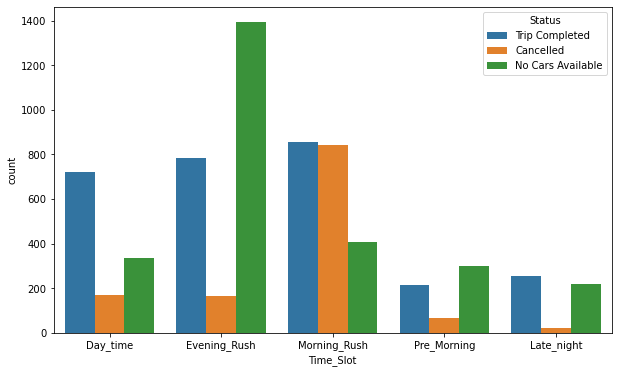

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.show()

** From below graph we can conclude that during morning rush most of the rides are from city & most of the rides cancelled are of city too **

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

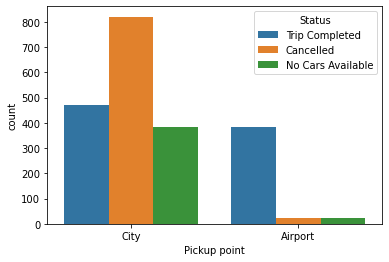

In [51]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

**cancellation of cab as per the pickup location at morning rush hours**

In [68]:
df_airport_cancelled= df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]

In [71]:
df_airport_cancelled.shape[0]

23

In [72]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [73]:
df_city_cancelled.shape[0]

820

#### cancelled from city= 820 and cancelled from airport =23 during morning rush

# Supply and demand

In [74]:
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:17:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 08:33:16,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 06:15:32,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 05:11:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 06:46:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,2016-07-15 09:15:16,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,2016-07-15 09:32:02,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,2016-07-15 09:34:14,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,2016-07-15 09:36:17,9,15,Morning_Rush


In [75]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [76]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [77]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [78]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

# Supply and Demand for evening rush

In [79]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']

In [80]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

#### from below graph we can conclude that during the evening rush mostly cars are not available

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

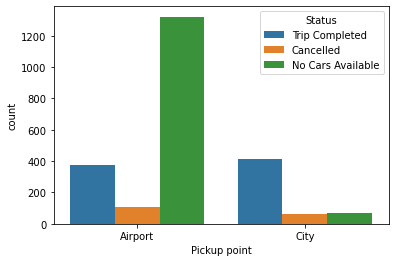

In [81]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [82]:
df_city_cancelled.shape[0]

60

In [83]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [84]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [85]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [86]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [87]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

**cancellation of cab as per the pickup location at evening rush hours**

In [88]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [89]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60